In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [2]:
df = pd.read_csv(r"C:\Users\kelvin\OneDrive\Desktop\Spark\lin_data.csv")
print(df.shape)
df.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


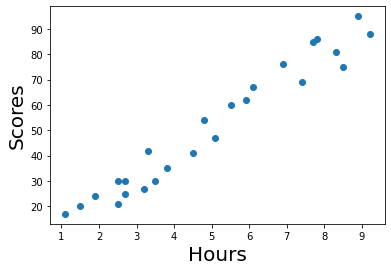

In [4]:
plt.scatter(df["Hours"],df["Scores"])
plt.xlabel("Hours",fontsize =20)
plt.ylabel("Scores",fontsize=20)
plt.show();

In [5]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [6]:
X = ["Hours"]
input1 = df[X] 
y = "Scores"
target = df[y]

print("Input shape",input1.shape)
print("target shape",target.shape)

Input shape (25, 1)
target shape (25,)


In [7]:
y_mean = target.mean()
y_pred_baseline = [y_mean]*len(target)
baseline_mae = mean_absolute_error(target,y_pred_baseline)
print("Mean apt price:", y_mean)
print("Baseline MAE:", baseline_mae)

Mean apt price: 51.48
Baseline MAE: 22.4192


In [8]:
model = LinearRegression()

In [9]:
model.fit(input1,target)

LinearRegression()

In [10]:
coefficients = model.coef_
intercept = model.intercept_
print("coefficients",coefficients)
print("Intercept",intercept)

coefficients [9.77580339]
Intercept 2.483673405373196


In [11]:
y_test_pred = pd.Series(model.predict(input1))
pred = (pd.DataFrame(y_test_pred,columns=["Pred"]))
pred

,Pred
0,26.923182
1,52.340271
2,33.766244
3,85.578002
4,36.698985
5,17.147378
6,92.421065
7,56.250592
8,83.622842
9,28.878343


In [12]:
Scores = pd.DataFrame(df.Scores.values,columns=["Scores"])
Scores.head()

,Scores
0,21
1,47
2,27
3,75
4,30


In [13]:
Scores["Pred"] = pred["Pred"]
diff = pd.DataFrame(Scores["Scores"].values - pred["Pred"].values,columns = ["Diff"])
print("Min",diff.min())
print("Max",diff.max())

Min Diff   -10.578002
dtype: float64
Max Diff    7.26506
dtype: float64


In [14]:
Scores["Diff"] = diff
Scores

,Scores,Pred,Diff
0,21,26.923182,-5.923182
1,47,52.340271,-5.340271
2,27,33.766244,-6.766244
3,75,85.578002,-10.578002
4,30,36.698985,-6.698985
5,20,17.147378,2.852622
6,88,92.421065,-4.421065
7,60,56.250592,3.749408
8,81,83.622842,-2.622842
9,25,28.878343,-3.878343


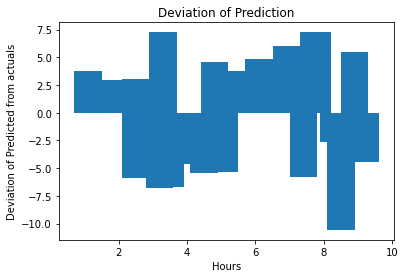

In [15]:
plt.bar(df["Hours"],Scores["Diff"])
plt.xlabel("Hours")
plt.ylabel("Deviation of Predicted from actuals")
plt.title("Deviation of Prediction")
plt.show()

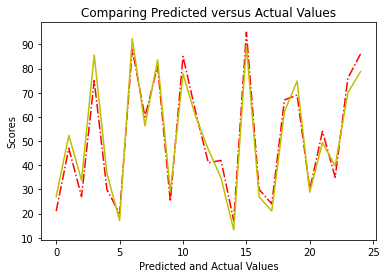

In [16]:
plt.plot(Scores["Scores"],'-.',color="r")
plt.plot(Scores["Pred"],color="y")
plt.title("Comparing Predicted versus Actual Values")
plt.xlabel("Predicted and Actual Values")
plt.ylabel("Scores")
plt.show()

In [17]:
import statsmodels.api as sm
import seaborn as sns
sns.set()

In [18]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [19]:
y= df["Scores"]
x1= df["Hours"]

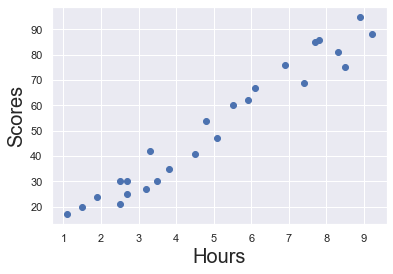

In [20]:
plt.scatter(x1,y)
plt.xlabel("Hours",fontsize =20)
plt.ylabel("Scores",fontsize=20)
plt.show();

In [21]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           9.13e-17
Time:                        23:40:22   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

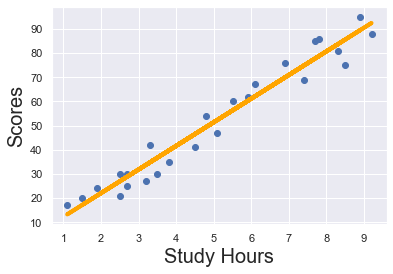

In [22]:
plt.scatter(x1,y)
yhat = 9.7758*x1 + 2.4837
fig = plt.plot(x1,yhat,lw=4,c="orange",label="regression line")
plt.xlabel("Study Hours",fontsize=20)
plt.ylabel("Scores",fontsize=20)
plt.show()

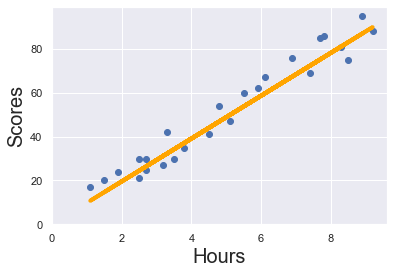

In [23]:
plt.scatter(x1,y)
yhat = 9.7758*x1 + 0
fig = plt.plot(x1,yhat,lw=4,c="orange",label="regression line")
plt.xlim(0)
plt.ylim(0)
plt.xlabel("Hours",fontsize=20)
plt.ylabel("Scores",fontsize=20)
plt.show()